## Installing [EasyOCR](https://github.com/JaidedAI/EasyOCR).

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [2]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
image1 = '/content/images/img1.jpeg'
image2 = '/content/images/img2.jpeg'

In [4]:
# Initializing easyocr Reader class 
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:
result1 = reader.readtext(image1, paragraph="False")
result2 = reader.readtext(image2, paragraph="False")

In [6]:
def darw_rect(image, bounding_data, is_byte=False):
  if not is_byte:
    image = cv2.imread(image)

  for res in bounding_data:
    top_left = tuple(res[0][0]) # top left coordinates as tuple
    bottom_right = tuple(res[0][2]) # bottom right coordinates as tuple
    # draw rectangle on image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2) 
    # write recognized text on image (top_left) minus 10 pixel on y
    cv2.putText(image, res[1], (top_left[0], top_left[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
  return image

def show_image(image, x=10, y=10, is_byte=False):
  x_new, y_new = x, y
  if not is_byte:
    image = mpimg.imread(image)
  plt.figure(figsize = (x_new, y_new))
  imgplot = plt.imshow(image, interpolation='nearest')
  plt.show()

def get_text(result):
  output = []
  for item in result:
    output.append(item[1])
  return ''.join(output)

## First Image Output

In [7]:
get_text(result1)

'Sug: SGenceLa =mexLox lens L71 Liku 8C 3 Mirtor LO C P 4t Jaa L` Sun Anind [uater_and2ygete KaixbbrSan fxm4 ke DConkez lens fokmS 4ko ay-s ; Conbave inadetulbtyees 0f polli dhexe ake Pollination = Peilnatien; @Crassc lens axe cahne frKn_by q concaue {s abtinec'

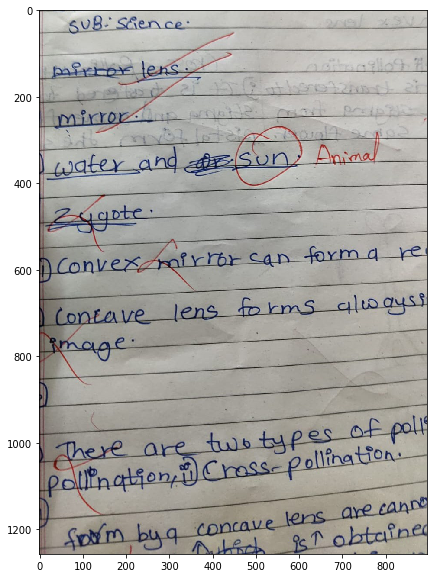

In [8]:
show_image(image1)

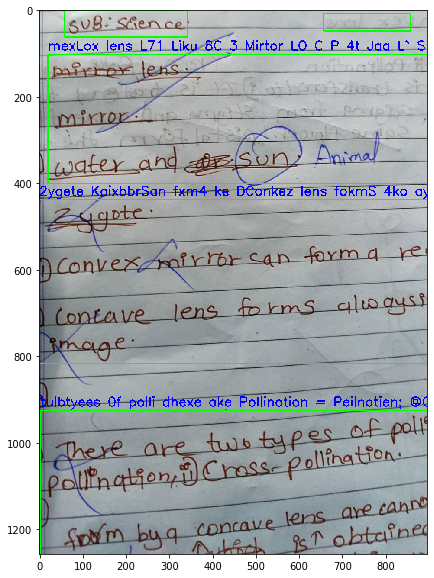

In [11]:
show_image(darw_rect(image1, result1), is_byte=True)

## Second Image Output

In [12]:
get_text(result2)

"85 1g 12 22Blik2 Joncata Lons Soncaxe iur (Ceneec mbult (lane misulor iv} cDavid aertorwing Zis _imng' (u 42 Je_mixin ~Aorftt 3 Au d and J erevebs Cln 3iaa Ehturoon ubavks ~cand Ywil dbq Zmage 3 m 5 YSm mijult Gus_The lat dl 0 Aitagundkcs ~Auxe daartctang &is mLs fna at A Qes an dhi elaSL dxrli Niols milz ~alkadimaa : dh Sahin Duk"

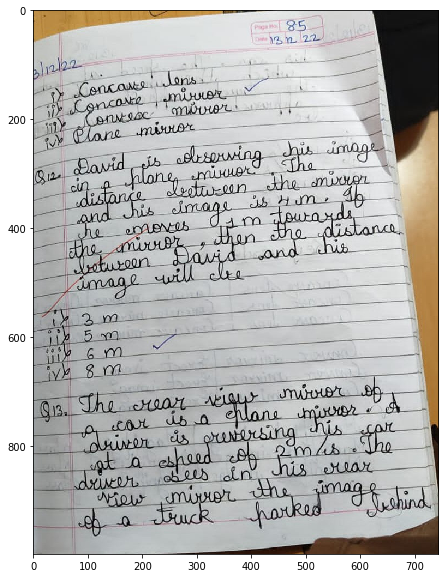

In [13]:
show_image(image2)

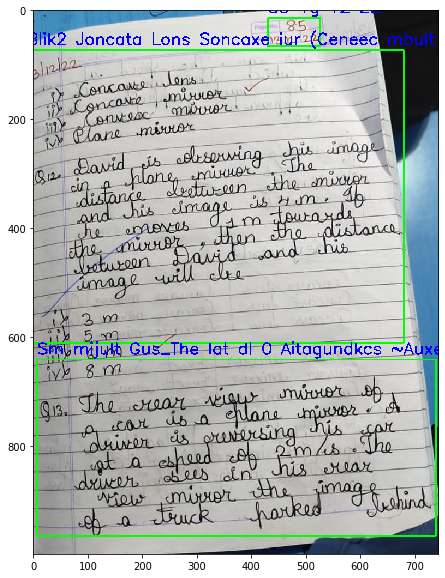

In [14]:
show_image(darw_rect(image2, result2), is_byte=True)